In [101]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from utils.intrinsic_dimension import twoNN
from utils.metrics import distance_correlation, id_correlation
from utils.utils import normalize, cat, shuffle
import scipy.stats
import seaborn as sns

In [102]:
def linear_correlation(X, Y):
    return np.corrcoef(X, Y, rowvar=False)[0,1]

In [103]:
np.random.seed(42)
torch.manual_seed(42)

N_points=5000

linear_X=torch.as_tensor(np.random.uniform(-1, 1, (N_points,1)), dtype=torch.float64)
linear_Y=linear_X
theta=torch.as_tensor(np.random.uniform(0, 6*np.pi, (N_points,1)), dtype=torch.float64)
r=theta/(6*np.pi)
spiral_X=r*torch.cos(theta)
spiral_Y=r*torch.sin(theta)
random_X=torch.as_tensor(np.random.normal(0, 1, (N_points,1)), dtype=torch.float64)
random_Y=torch.as_tensor(np.random.normal(0, 1, (N_points,1)), dtype=torch.float64)
hd_random_X=torch.as_tensor(np.random.normal(0, 1, (N_points,5)), dtype=torch.float64)
hd_random_Y=torch.as_tensor(np.random.normal(0, 1, (N_points,5)), dtype=torch.float64)

In [104]:
print(linear_correlation(random_X, random_Y))
print(distance_correlation(random_X, random_Y))
print(id_correlation(random_X, random_Y))

0.028727419855999182
0.001042892807953913


KeyboardInterrupt: 

In [ ]:
print(linear_correlation(linear_X, linear_Y))
print(distance_correlation(linear_X, linear_Y))
print(id_correlation(linear_X, linear_Y))

1.0
0.9999999845024797
{'corr': 1.0000000000000004, 'p': 0.009900989942252636}


In [106]:
print(linear_correlation(spiral_X, spiral_Y))
print(distance_correlation(spiral_X, spiral_Y))
print(id_correlation(spiral_X, spiral_Y))

-0.08504475222164695
0.01603882441989698
{'corr': 0.9429402970189129, 'p': 0.009900989942252636}


In [ ]:
print(id_correlation(hd_random_X, hd_random_Y))

{'corr': 0.03904457210365647, 'p': 0.3663366436958313}


In [ ]:
idcor['original Id'], idcor['Mean shuffled Id'], idcor['Std shuffled Id']

(1.0220066948875492, tensor(1.9216), tensor(0.0591))

1.9924218341708184


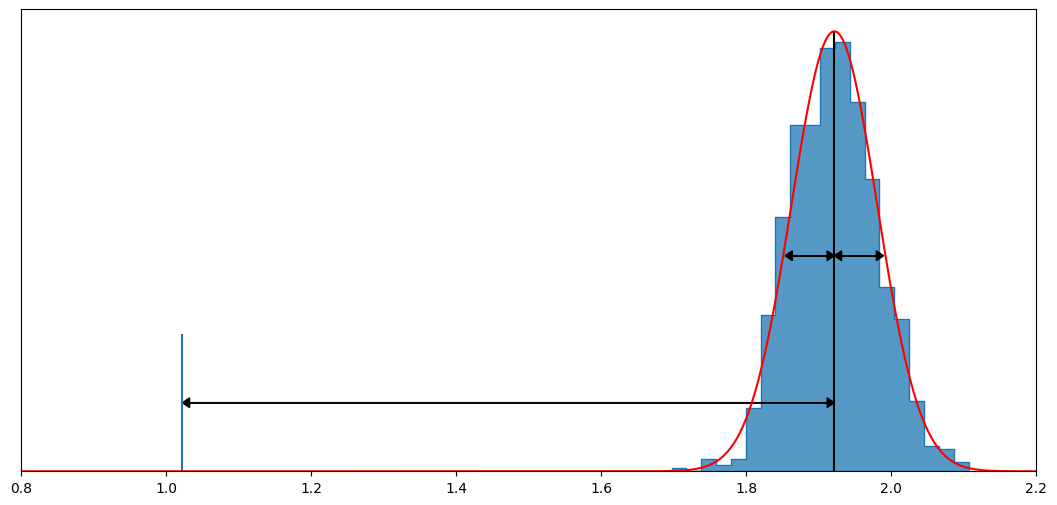

In [ ]:
shu=idcor['All shuffles'].numpy()
no=idcor['original Id']
plt.figure(figsize=(13.1, 6))
#plt.xlabel('$I_d$', fontsize=24)
plt.yticks([])
sns.histplot(shu, bins=20, stat='density', element="step")
x = np.linspace(0.8, 2.3, 1000)
gaussian=scipy.stats.norm.pdf(x, np.mean(shu), np.std(shu))
print(np.mean(shu)+1.2*np.std(shu))
height=gaussian[(np.abs(x - np.mean(shu)+1.2*np.std(shu))).argmin()]
plt.plot(x, gaussian, c='r')
plt.arrow(np.mean(shu), height, 1.15*np.std(shu), 0, fc="k", ec="k", length_includes_head=True, head_width=0.15, head_length=0.010)
plt.arrow(np.mean(shu)+np.std(shu), height, -np.std(shu), 0, fc="k", ec="k", length_includes_head=True, head_width=0.15, head_length=0.010)

plt.arrow(np.mean(shu), height, -1.15*np.std(shu), 0, fc="k", ec="k", length_includes_head=True, head_width=0.15, head_length=0.010)
plt.arrow(np.mean(shu)-np.std(shu), height, np.std(shu), 0, fc="k", ec="k", length_includes_head=True, head_width=0.15, head_length=0.010)

plt.arrow(np.mean(shu), np.max(shu)/2, idcor['Z']*np.std(shu), 0, fc="k", ec="k", length_includes_head=True, head_width=0.15, head_length=0.010)
plt.arrow(np.mean(shu)+idcor['Z']*np.std(shu), np.max(shu)/2, -idcor['Z']*np.std(shu), 0, fc="k", ec="k", length_includes_head=True, head_width=0.15, head_length=0.010)

plt.vlines(no, ymin=0, ymax=np.max(shu))
plt.vlines(np.mean(shu), ymin=0, ymax=np.max(gaussian), color='k')
plt.xlim(0.8, 2.2)
plt.savefig('results/id_low.svg', dpi=200, bbox_inches='tight', format='svg')

In [ ]:
print(linear_correlation(random_X, random_Y))
print(distance_correlation(random_X, random_Y))
print(id_correlation(random_X, random_Y))

0.015073749963058283
0.0027630283551866746
{'Z': -1.205246090888977, 'p': 0.09900990128517151, 'original Id': 1.9333250309549823, 'Mean shuffled Id': tensor(2.0071), 'Std shuffled Id': tensor(0.0612), 'All shuffles': tensor([2.0364, 2.0506, 2.0901, 2.0110, 2.0553, 1.9959, 2.0470, 1.9334, 2.0317,
        2.0874, 1.9907, 1.9267, 2.0687, 2.0750, 2.0218, 1.9531, 2.0166, 1.9580,
        2.0764, 1.9675, 1.9319, 1.9561, 1.8231, 2.0671, 1.9174, 2.1051, 2.1128,
        1.9389, 1.9626, 2.0092, 2.0394, 2.0029, 1.9488, 2.1555, 1.9889, 1.9975,
        2.0957, 2.1096, 1.9676, 1.9916, 1.9227, 2.0121, 1.8992, 1.8173, 2.0655,
        1.9677, 2.0821, 2.0030, 1.9619, 2.0616, 2.0043, 1.9516, 2.0049, 1.9974,
        1.9570, 1.9749, 1.9299, 2.0291, 1.9815, 2.0619, 2.0152, 1.9470, 1.9984,
        2.0075, 2.0296, 1.9172, 2.0750, 1.9475, 1.9871, 2.0184, 2.0681, 2.1298,
        1.9862, 2.0619, 2.0898, 1.9537, 1.9335, 2.0868, 2.0905, 1.9980, 1.9896,
        1.9857, 2.0910, 2.0111, 2.0103, 1.9776, 1.9746, 2.0045,

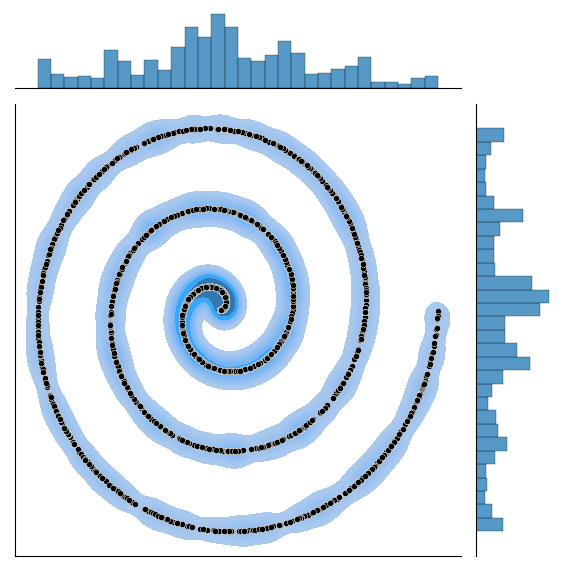

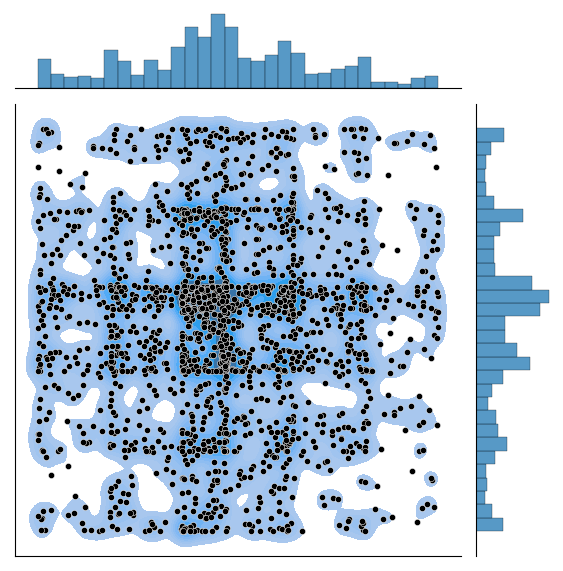

In [ ]:
spiral = cat([spiral_X, spiral_Y]).numpy()
shuffled = cat([spiral_X, shuffle(spiral_Y)]).numpy()

g=sns.jointplot(data=spiral, x=spiral[:,0], y=spiral[:,1], s=20, color='k', kind='scatter', marginal_kws={'color': 'tab:blue', 'bins': 30, 'linewidth': 0.2})
g.plot_joint(sns.kdeplot, zorder=0, levels=10,bw_adjust=0.3, fill=True)#
g.ax_joint.set_xticks([])
g.ax_joint.set_yticks([])
plt.savefig('results/spiral.svg', dpi=200, bbox_inches='tight', format='svg')

g=sns.jointplot(data=shuffled, x=shuffled[:,0], y=shuffled[:,1], s=20, color='k', kind='scatter', marginal_kws={'color': 'tab:blue', 'bins': 30, 'linewidth': 0.2})
g.plot_joint(sns.kdeplot, zorder=0, levels=10,bw_adjust=0.3, fill=True)
g.ax_joint.set_xticks([])
g.ax_joint.set_yticks([])

plt.savefig('results/shuffled_spiral.svg', dpi=200, bbox_inches='tight', format='svg')